In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.zip to test.zip
Saving train.zip to train.zip


In [ ]:
!unzip train.zip
!unzip test.zip

Archive:  train.zip
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.101.jpg       
  inflating: train/cat.102.jpg       
  inflating: train/cat.103.jpg       
  inflating: train/cat.104.jpg       
  inflating: train/cat.105.jpg       
  inflating: train/cat.106.jpg       
  inflating: train/cat.107.jpg       
  inflating: train/cat.108.jpg       
  inflating: train/cat.109.jpg       
  inflating: train/cat.11.jpg        
  inflating: train/cat.110.jpg       
  inflating: train/cat.111.jpg       
  inflating: train/cat.112.jpg       
  inflating: train/cat.113.jpg       
  inflating: train/cat.114.jpg       
  inflating: train/cat.115.jpg       
  inflating: train/cat.116.jpg       
  inflating: train/cat.117.jpg       
  inflating: train/cat.118.jpg       
  inflating: train/cat.119.jpg       
  inflating: train/cat.12.jpg        
  inflating: train/cat.120.jpg

In [ ]:
train_dir = 'train'
test_dir = 'test1'

def load_images(directory, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            label = 1 if 'dog' in filename else 0  # 1 for dog, 0 for cat
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, image_size)
            img = img.astype('float32') / 255.0
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
X, Y = load_images(train_dir)

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
import joblib

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_flat, Y_train)
joblib.dump(svm_model, 'svm_model.pkl')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
svm_model = joblib.load('svm_model.pkl')

Y_val_pred = svm_model.predict(X_val_flat)

accuracy = accuracy_score(Y_val, Y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')
print(classification_report(Y_val, Y_val_pred))

Validation Accuracy: 51.24%
              precision    recall  f1-score   support

           0       0.53      0.57      0.55       105
           1       0.49      0.45      0.47        96

    accuracy                           0.51       201
   macro avg       0.51      0.51      0.51       201
weighted avg       0.51      0.51      0.51       201



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_labels.csv to test_labels.csv


In [ ]:
def load_images_with_labels(directory, labels_df, image_size=(64, 64)):
    images = []
    labels = []
    label_dict = {'cat': 0, 'dog': 1}
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            file_number = os.path.splitext(filename)[0]

            label = labels_df.loc[labels_df['filename'] == int(file_number), 'label'].values[0]
            label = label_dict[label]

            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, image_size)
            img = img.astype('float32') / 255.0  # Normalize
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
labels_df = pd.read_csv('test_labels.csv')

X_test, Y_test = load_images_with_labels(test_dir, labels_df, image_size=(64, 64))

if X_test.size == 0:
    raise ValueError("No images loaded. Check if the directory path and labels are correct.")

X_test_flat = X_test.reshape(X_test.shape[0], -1)

svm_model = joblib.load('svm_model.pkl')

Y_test_pred = svm_model.predict(X_test_flat)

test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(classification_report(Y_test, Y_test_pred))

Test Accuracy: 58.50%
              precision    recall  f1-score   support

           0       0.59      0.64      0.61       204
           1       0.58      0.53      0.56       196

    accuracy                           0.58       400
   macro avg       0.58      0.58      0.58       400
weighted avg       0.58      0.58      0.58       400



Saving img1.jpg to img1.jpg
Saving img2.jpg to img2.jpg
The image img1.jpg is classified as: Cat


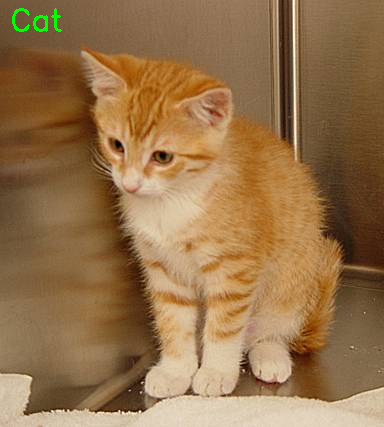

The image img2.jpg is classified as: Dog


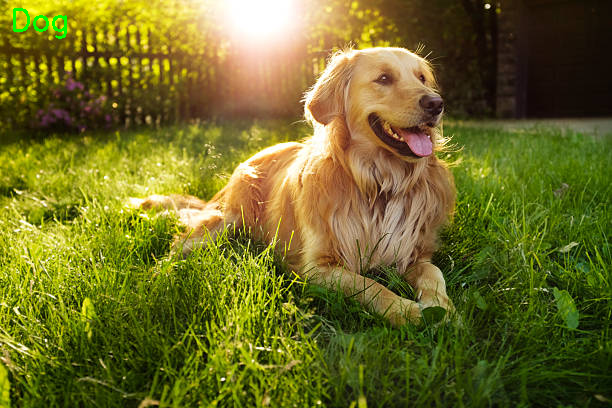

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import files

def upload_images():
    uploaded = files.upload()
    file_paths = [filename for filename in uploaded.keys()]
    return file_paths

svm_model = joblib.load('svm_model.pkl')

image_paths = upload_images()

for img_path in image_paths:
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (64, 64))
    img_normalized = img_resized.astype('float32') / 255.0
    img_flat = img_normalized.flatten().reshape(1, -1)

    prediction = svm_model.predict(img_flat)
    label = 'Dog' if prediction == 1 else 'Cat'

    print(f'The image {img_path} is classified as: {label}')

    cv2.putText(img, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2_imshow(img)